In [64]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score

In [2]:
data, meta = arff.loadarff('data_1600_accel_watch.arff')
data
df = pd.DataFrame(data)
df

,"""ACTIVITY""","""X0""","""X1""","""X2""","""X3""","""X4""","""X5""","""X6""","""X7""","""X8""",...,"""ZMFCC11""","""ZMFCC12""","""XYCOS""","""XZCOS""","""YZCOS""","""XYCOR""","""XZCOR""","""YZCOR""","""RESULTANT""","""class"""
0,b'A',0.000,0.000,0.000,0.045,0.090,0.190,0.215,0.210,0.135,...,0.504662,0.498178,-0.395887,-0.105039,-0.263814,-0.035912,-0.305539,-0.292265,12.7783,b'1600'
1,b'A',0.000,0.000,0.000,0.000,0.030,0.250,0.305,0.225,0.125,...,0.497101,0.490714,-0.517585,-0.493655,0.208926,-0.166636,0.071774,-0.070860,12.8712,b'1600'
2,b'A',0.000,0.000,0.000,0.000,0.015,0.280,0.300,0.210,0.140,...,0.438027,0.432398,-0.573148,-0.468498,0.001704,-0.090878,0.005053,-0.382557,12.5949,b'1600'
3,b'A',0.000,0.000,0.000,0.005,0.070,0.245,0.275,0.220,0.130,...,0.447493,0.441743,-0.514097,-0.232246,-0.080241,-0.117089,0.137656,-0.265747,12.3521,b'1600'
4,b'A',0.000,0.000,0.000,0.000,0.015,0.260,0.325,0.230,0.110,...,0.433304,0.427736,-0.461254,0.084470,-0.418888,-0.097265,-0.118795,-0.414198,12.4168,b'1600'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,b'S',0.730,0.070,0.090,0.030,0.040,0.030,0.005,0.005,0.000,...,0.572075,0.564724,0.432426,-0.323714,0.149581,-0.232945,-0.370435,0.366658,10.2891,b'1600'
323,b'S',0.660,0.080,0.080,0.055,0.085,0.030,0.010,0.000,0.000,...,0.536467,0.529573,0.386579,-0.452506,0.137247,-0.107110,-0.514242,0.314914,10.2826,b'1600'
324,b'S',0.920,0.065,0.010,0.000,0.000,0.005,0.000,0.000,0.000,...,0.564000,0.556752,0.701466,-0.488788,-0.209296,-0.010531,0.039774,0.418878,10.1310,b'1600'
325,b'S',0.665,0.055,0.075,0.100,0.090,0.010,0.005,0.000,0.000,...,0.498486,0.492080,0.425515,-0.288078,0.290897,-0.247808,-0.569842,0.003633,10.1086,b'1600'


Moving and Static
Moving: Walking: A, Jogging: B, stairs: C, standing: E, kicking(Soccer Ball): M,
Playing Catch w/Tennis Ball: O, Dribbling(Basketball): P

In [3]:
A = df.loc[df['"ACTIVITY"']== b'A']
A['"ACTIVITY"']
df.to_csv('df1.csv')

In [24]:
input = pd.read_csv('df1.csv')
input.dtypes
input.head(10)

,"""ACTIVITY""","""X0""","""X1""","""X2""","""X3""","""X4""","""X5""","""X6""","""X7""","""X8""",...,"""ZMFCC11""","""ZMFCC12""","""XYCOS""","""XZCOS""","""YZCOS""","""XYCOR""","""XZCOR""","""YZCOR""","""RESULTANT""","""class"""
0,1,0.0,0.0,0.0,0.045,0.090,0.190,0.215,0.210,0.135,...,0.504662,0.498178,-0.395887,-0.105039,-0.263814,-0.035912,-0.305539,-0.292265,12.7783,b'1600'
1,1,0.0,0.0,0.0,0.000,0.030,0.250,0.305,0.225,0.125,...,0.497101,0.490714,-0.517585,-0.493655,0.208926,-0.166636,0.071774,-0.070860,12.8712,b'1600'
2,1,0.0,0.0,0.0,0.000,0.015,0.280,0.300,0.210,0.140,...,0.438027,0.432398,-0.573148,-0.468498,0.001704,-0.090878,0.005053,-0.382557,12.5949,b'1600'
3,1,0.0,0.0,0.0,0.005,0.070,0.245,0.275,0.220,0.130,...,0.447493,0.441743,-0.514097,-0.232246,-0.080241,-0.117089,0.137656,-0.265747,12.3521,b'1600'
4,1,0.0,0.0,0.0,0.000,0.015,0.260,0.325,0.230,0.110,...,0.433304,0.427736,-0.461254,0.084470,-0.418888,-0.097265,-0.118795,-0.414198,12.4168,b'1600'
5,1,0.0,0.0,0.0,0.020,0.110,0.295,0.220,0.155,0.145,...,0.513645,0.507045,-0.515503,0.254423,-0.287578,-0.091598,-0.164082,-0.152699,12.1479,b'1600'
6,1,0.0,0.0,0.0,0.010,0.065,0.260,0.285,0.205,0.115,...,0.416344,0.410994,-0.524796,-0.435362,0.113136,-0.115562,-0.103565,-0.138754,12.0715,b'1600'
7,1,0.0,0.0,0.0,0.015,0.160,0.240,0.210,0.185,0.145,...,0.482394,0.476195,-0.581123,-0.051553,-0.206350,-0.047448,-0.350743,-0.212857,11.8520,b'1600'
8,1,0.0,0.0,0.0,0.000,0.055,0.265,0.245,0.205,0.150,...,0.455328,0.449477,-0.386796,-0.360474,-0.012034,-0.038745,0.035246,-0.190623,12.7896,b'1600'
9,1,0.0,0.0,0.0,0.005,0.055,0.280,0.250,0.175,0.160,...,0.436626,0.431015,-0.581727,-0.430234,0.047552,-0.096894,-0.073358,-0.274483,12.3999,b'1600'


In [27]:
input = input.sample(frac = 1)
input.head(10)

,"""ACTIVITY""","""X0""","""X1""","""X2""","""X3""","""X4""","""X5""","""X6""","""X7""","""X8""",...,"""ZMFCC11""","""ZMFCC12""","""XYCOS""","""XZCOS""","""YZCOS""","""XYCOR""","""XZCOR""","""YZCOR""","""RESULTANT""","""class"""
167,0,0.710,0.290,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.428467,0.422961,0.890964,-0.605268,-0.568398,0.283932,0.736353,0.743472,9.60389,b'1600'
148,0,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.461790,0.455856,0.644841,-0.843297,-0.772384,-0.539393,0.596271,-0.154589,9.84820,b'1600'
133,0,0.660,0.340,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.269071,0.265613,0.915023,-0.162912,-0.317234,-0.706489,0.402365,-0.010420,9.60434,b'1600'
17,1,0.000,0.000,0.000,0.035,0.195,0.310,0.215,0.155,0.055,...,0.447632,0.441880,-0.388281,0.460659,-0.146378,0.011350,-0.416856,0.139496,11.28570,b'1600'
229,1,0.000,0.000,0.005,0.005,0.080,0.445,0.370,0.065,0.020,...,0.515288,0.508667,-0.370281,-0.312872,0.294705,0.089640,0.178613,0.179939,10.73450,b'1600'
62,0,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,...,0.440034,0.434380,-0.999498,0.999935,-0.999579,0.127002,0.071537,0.161076,9.78381,b'1600'
231,1,0.005,0.000,0.005,0.025,0.135,0.470,0.230,0.075,0.030,...,0.522607,0.515891,-0.395181,0.013929,0.161674,-0.006194,-0.347334,0.233538,10.78520,b'1600'
140,0,0.425,0.575,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.360141,0.355513,0.932888,-0.513194,-0.603091,-0.173200,0.390289,0.506422,9.59231,b'1600'
318,0,0.640,0.125,0.035,0.055,0.140,0.005,0.000,0.000,0.000,...,0.509888,0.503336,0.314598,-0.442570,-0.459126,-0.398376,-0.181040,0.276671,10.13220,b'1600'
202,0,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.271623,0.268132,0.936686,-0.786732,-0.672299,-0.791606,-0.298012,0.607374,9.63291,b'1600'


In [47]:
Y = input.iloc[:,0].values
X = input.iloc[:, 1:92].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

In [66]:
Y_train.reshape(-1,1)
Y_test.reshape(-1,1)

f1=[]

for i in range (5, 260, 5):
    X_train_stream = X_train[0:i,:]
    Y_train_stream = Y_train[0:i]
    Y_pred = knn_classifier(X_train_stream, Y_train_stream, X_test, n_neighbors=5)
    # print(f1_score(Y_test, Y_pred, average='weighted'))
    f1.append(f1_score(Y_test, Y_pred, average='weighted'))

Text(0, 0.5, 'f1 score')

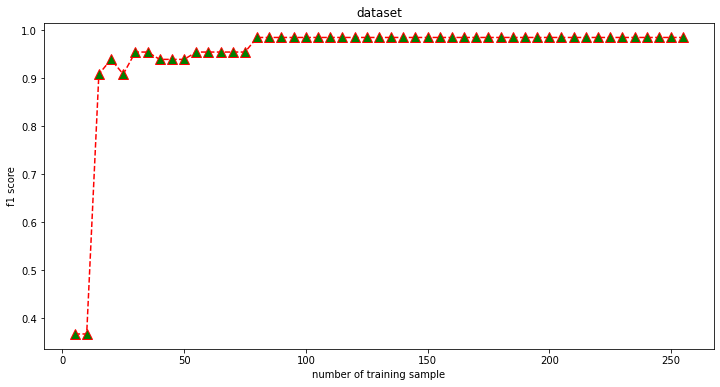

In [80]:

plt.figure(figsize=(12, 6))
plt.plot(range(5, 260, 5), f1, color='red', linestyle='dashed', marker='^',
         markerfacecolor='green', markersize=10)
plt.title('dataset')
plt.xlabel('number of training sample')
plt.ylabel('f1 score')

In [56]:
def knn_classifier(X_train, Y_train, X_test, n_neighbors):
    classifier =  KNeighborsClassifier(n_neighbors = n_neighbors)
    classifier.fit(X_train, Y_train)
    Y_pred = classifier.predict(X_test)
    return Y_pred


In [81]:
Y_pred = knn_classifier(X_train_stream, Y_train_stream, X_test, n_neighbors=5)
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test,Y_pred))

[[34  1]
 [ 0 31]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.97      1.00      0.98        31

    accuracy                           0.98        66
   macro avg       0.98      0.99      0.98        66
weighted avg       0.99      0.98      0.98        66



In [59]:
# error = []
#
# # Calculating error for K values between 1 and 40
# for i in range(1, 40):
#     knn = KNeighborsClassifier(n_neighbors=i)
#     knn.fit(X_train, Y_train)
#     pred_i = knn.predict(X_test)
#     error.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Mean Error')

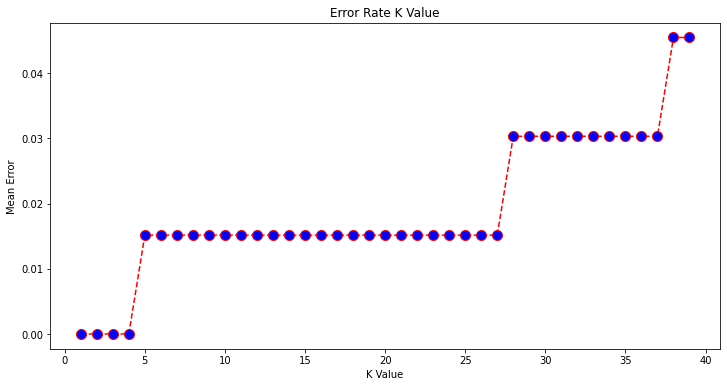

In [40]:
# plt.figure(figsize=(12, 6))
# plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
#          markerfacecolor='blue', markersize=10)
# plt.title('Error Rate K Value')
# plt.xlabel('K Value')
# plt.ylabel('Mean Error')